## Final Project Submission

Please fill out:
* Student name: HELLEN DIANA NJERI MACHARIA
* Student pace:  part time 
* Scheduled project review date/time: 
* Instructor name: MARYANNE MWIKALI
* Blog post URL:


# AVIATION DATA ANALYSIS

## BUSINESS UNDERSTANDING

### INTRODUCTION

As a strategic plan to diversify its portfolio, our company plans to enter the aviation industry by purchasing and operating airplanes for commercial and private enterprises. 
However, the company currently lacks knowledge regarding the potential risks associated with different types of aircraft.
This project aims to provide a data-driven evaluation of various aircrafts to guide the company in making informed purchasing decisions.



### STAKEHOLDERS

The primary stakeholders are:

. Head of Aviation Division

  Responsible to select which aircraft to purchase based on the findings of the project for the best interest of the company.

. Executive management Team
  
  Ensures that the project aligns with the company's risk standards and is financially viable.

. Operation managers. 
  
  Implement the insights to plan for staffing,logistics and maintenance.

  ### The stakeholders will use the project findings to:

  . Select the aircraft with low accident rates and strong safety records.
  
  . Estimate the maintenance costs associated with the aircraft selected.
  

# Conclusion

The project provides actionable insights that will guide the aviation division make strategic purchasing decisions by selecting safer and more reliable aircrafts that will give the company a soft landing in their quest to diversify their porfolio.

By making this informed decision,the company will enjoy operational excellence,customer trust and a successful entry into the aviation sector.


## Import the relevant libraries

In this cell we import the relevant libraries needed for data manipulation and visualization



In [95]:
# Run this cell to import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load the Data into a data frame called 'Aviation_df'

In this repository under the file path 'data\Aviation_Data.csv' there is a CSV file containing information about Aviation data.

We will load the csv file into a dataframe.

In [ ]:
# load the data
file_path = 'data\Aviation_Data.csv'
Aviation_df=pd.read_csv('data\Aviation_Data.csv')
Aviation_df.head() # Display the first 5 rows of the dataframe

c:\Users\helle\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Create a copy of the dataframe to ensure you can make changes to the data without altering the original dataset

In [51]:
# create a copy of the dataframe
Aviation_df_cleaned = Aviation_df.copy()

## Inspect the data

In this section we are going to understand the data structure by inspecting :
- Shape
- Column names
- Data Types
- Duplicates
- Missing Values
- Descriptive statistics
- Sample row of the data frame

In [52]:
# check the number of rows and columns in the dataframe
Aviation_df_cleaned.shape

(90348, 31)

In [53]:
# list of the columns in the dataframe
Aviation_df_cleaned.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [54]:
# check the data types of the columns in the dataframe
Aviation_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [ ]:
# check for missing values in the dataframe
Aviation_df_cleaned.isnull().sum().sort_values(ascending=True) # Display the number of missing values in each column, sorted in ascending order

Investigation.Type            0
Event.Id                   1459
Accident.Number            1459
Event.Date                 1459
Location                   1511
Make                       1522
Model                      1551
Amateur.Built              1561
Country                    1685
Injury.Severity            2459
Registration.Number        2776
Aircraft.damage            4653
Weather.Condition          5951
Total.Uninjured            7371
Number.of.Engines          7543
Purpose.of.flight          7651
Report.Status              7840
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Minor.Injuries      13392
Total.Serious.Injuries    13969
Publication.Date          16689
Broad.phase.of.flight     28624
Airport.Name              37558
Airport.Code              40099
Latitude                  55966
Longitude                 55975
Aircraft.Category         58061
FAR.Description           58325
Air.carrier               73700
Schedule                  77766
dtype: i

In [56]:
# check for duplicates in the dataframe
duplicate_rows = Aviation_df_cleaned.duplicated().sum() # Display the number of duplicate rows in the dataframe
duplicate_rows

1390

In [ ]:
# Display summary statistics of all columns in the dataframe
Aviation_df_cleaned.describe() 

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [ ]:
# view a sample row of the dataframe
Aviation_df_cleaned.sample() 

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
22600,20001213X27958,Accident,MKC89FA083,1989-03-24,"MAYFLOWER, AR",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,VMC,Maneuvering,Probable Cause,11-07-1990


# DATA UNDERSTANDING

## DATA SOURCES
The dataset used for this analysis provides a historical record of aviation accidents and safety incidences recorded from various regulatory bodies.

The dataset contains detailed information on aircraft accidents,injuries and aircraft types that provide an ideal understanding of the safety profiles of various aircrafts which is in line with our project's objective to identify the *lowest risk aircraft* for purchase.

## Drop unwanted columns


In [61]:
# list of the columns to be dropped
columns_to_drop = [
    'Event.Id', 'Accident.Number', 'Investigation.Type', 'Registration.Number',
    'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Report.Status',
    'Publication.Date', 'Air.carrier'
]


In [59]:
# drop the columns from the dataframe
Aviation_df_cleaned= Aviation_df_cleaned.drop(columns=columns_to_drop)


In [63]:
Aviation_df_cleaned.info() # Display the information of the cleaned dataframe
Aviation_df_cleaned.shape # Display the shape of the cleaned dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Event.Date              88889 non-null  object 
 2   Location                88837 non-null  object 
 3   Country                 88663 non-null  object 
 4   Injury.Severity         87889 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Number.of.Engines       82805 non-null  float64
 10  Engine.Type             81812 non-null  object 
 11  Total.Fatal.Injuries    77488 non-null  float64
 12  Total.Serious.Injuries  76379 non-null  float64
 13  Total.Minor.Injuries    76956 non-null  float64
 14  Total.Uninjured         82977 non-null

(90348, 17)

In [65]:
# check for missing data in the cleaned dataframe
missing_values_cleaned = Aviation_df_cleaned.isnull().sum()
missing_values_cleaned

Event.Id                   1459
Event.Date                 1459
Location                   1511
Country                    1685
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Number.of.Engines          7543
Engine.Type                8536
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
dtype: int64

## Handling missing Data

In [66]:
# Aircraft.Category
# Check the distribution of the 'Aircraft.Category' column
Aviation_df_cleaned['Aircraft.Category'].value_counts()

# Fill the missing values with 'Unknown'
Aviation_df_cleaned['Aircraft.Category'].fillna('Unknown')

0         Unknown
1         Unknown
2         Unknown
3         Unknown
4         Unknown
           ...   
90343     Unknown
90344     Unknown
90345    Airplane
90346     Unknown
90347     Unknown
Name: Aircraft.Category, Length: 90348, dtype: object

This shows that the most common category in the 'Aircraft Category' column is 'Aeroplane'

In [67]:
# # fill missing values in the broad phase of flight column with Unknown
Aviation_df_cleaned['Broad.phase.of.flight']= Aviation_df_cleaned['Broad.phase.of.flight'].fillna('Unknown') 

In [ ]:
# fill the injury columns with 0
injury_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
for column in injury_columns:
    Aviation_df_cleaned[column] = Aviation_df_cleaned[column].fillna(0)

In [70]:
# FILL 'Number.of.Engine' missing values with 1
Aviation_df_cleaned['Number.of.Engines'] = Aviation_df_cleaned['Number.of.Engines'].fillna(1) 

In [72]:
# fill  'Engine.Type' missing values with 'mode of the column'
Aviation_df_cleaned['Engine.Type'] = Aviation_df_cleaned['Engine.Type'].fillna(Aviation_df_cleaned['Engine.Type'].mode()[0]) 


In [73]:
# fill the missing values in the 'weather condition' column with the mode of the column
Aviation_df_cleaned['Weather.Condition'] = Aviation_df_cleaned['Weather.Condition'].fillna(Aviation_df_cleaned['Weather.Condition'].mode()[0]) 

In [74]:
# fill the missing values in 'aircraft damage' column with the mode of the column
Aviation_df_cleaned['Aircraft.damage'] = Aviation_df_cleaned['Aircraft.damage'].fillna(Aviation_df_cleaned['Aircraft.damage'].mode()[0])


In [75]:
# check the unique values in 'injury severity' column
Aviation_df_cleaned['Injury.Severity'].value_counts() # Display the value counts of the 'Injury.Severity' column
# fill the missing data in 'injury severity' column with the mode of the column
Aviation_df_cleaned['Injury.Severity'] = Aviation_df_cleaned['Injury.Severity'].fillna(Aviation_df_cleaned['Injury.Severity'].mode()[0])

In [76]:
# fill the missing values in the 'Model' columns with 'Unknown'
Aviation_df_cleaned['Model'] = Aviation_df_cleaned['Model'].fillna('Unknown') 


In [77]:
#make column
Aviation_df_cleaned['Make']= Aviation_df_cleaned['Make'].fillna('Unknown')  # Safely fill missing values

In [79]:
# Extract the year from the 'Event.Date' column and create a new column 'Year'
Aviation_df_cleaned['Year'] = pd.to_datetime(Aviation_df_cleaned['Event.Date'], errors='coerce').dt.year

In [80]:
 # Display the columns of the cleaned dataframe
Aviation_df_cleaned.columns

Index(['Event.Id', 'Event.Date', 'Location', 'Country', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Number.of.Engines', 'Engine.Type', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Year'],
      dtype='object')

In [81]:
#shape of the cleaned dataframe
Aviation_df_cleaned.shape

(90348, 18)

# ANALYSIS

This helps us to understand the basisc distributions by knowing which categories dominate

In [83]:
Aviation_df_cleaned['Aircraft.Category'].value_counts()
Aviation_df_cleaned['Injury.Severity'].value_counts()
Aviation_df_cleaned['Aircraft.damage'].value_counts()
Aviation_df_cleaned['Weather.Condition'].value_counts()


VMC    83254
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

# Which aircraft category has more fatal accidents


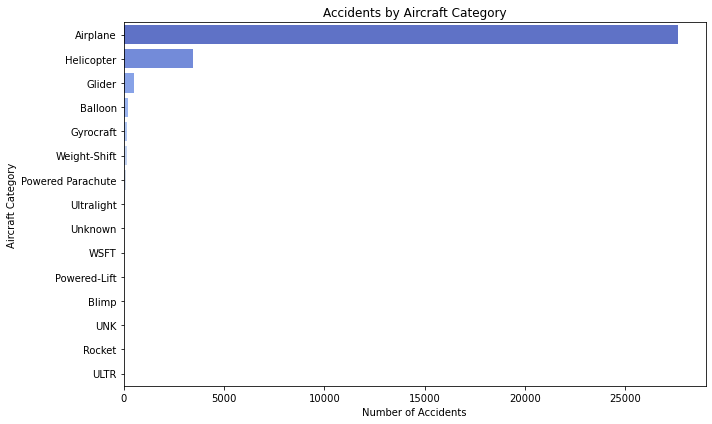

In [96]:
plt.figure(figsize=(10,6))

x = Aviation_df_cleaned['Aircraft.Category'].value_counts().index
y= Aviation_df_cleaned['Aircraft.Category'].value_counts().values

sns.countplot(data=Aviation_df_cleaned, 
              y='Aircraft.Category',   # y-axis for categories
              order=Aviation_df_cleaned['Aircraft.Category'].value_counts().index, 
              palette='coolwarm')      # nice color theme

plt.title('Accidents by Aircraft Category')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Category')
plt.tight_layout()
plt.show()

# Aircrafts with least Accidents

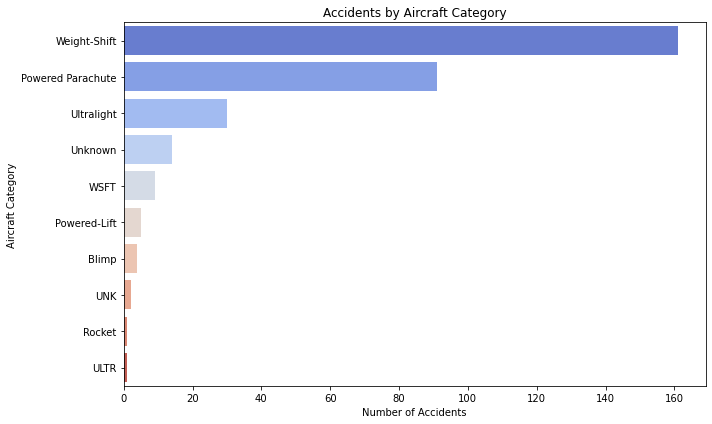

In [97]:
# AIRCRAFT WITH LEAST ACCIDENTS BARPLOT

plt.figure(figsize=(10,6))
x = Aviation_df_cleaned['Aircraft.Category'].value_counts().index[-10:]
y= Aviation_df_cleaned['Aircraft.Category'].value_counts().values[-10:]

sns.countplot(data=Aviation_df_cleaned,
              y='Aircraft.Category',   # y-axis for categories
              order=Aviation_df_cleaned['Aircraft.Category'].value_counts().index[-10:], 
              palette='coolwarm')      # nice color theme
plt.title('Accidents by Aircraft Category')
plt.xlabel('Number of Accidents')
plt.ylabel('Aircraft Category')
plt.tight_layout()
plt.show()